<h2 style="text-align:center;">How does a bike-share navigate speedy success.</h2><br>

## Import Python libraries

In [34]:
import os
import warnings
from math import radians, cos, sin, asin, sqrt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import plotly.graph_objects as go

## Define constants

In [35]:
# Constants
MAX_UNIQUE_VALUES = 5
DATA_FOLDER = os.path.join(os.getcwd(), "data")
FILE_2019_Q1 = "Cyclistic_Trips_2019_Q1.csv"
FILE_2019_Q2 = "Cyclistic_Trips_2019_Q2.csv"
FILE_2019_Q3 = "Cyclistic_Trips_2019_Q3.csv"
FILE_2019_Q4 = "Cyclistic_Trips_2019_Q4.csv"
FILE_2020_Q1 = "Cyclistic_Trips_2020_Q1.csv"
DAY_ORDER = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
CURRENT_YEAR = 2025

## Define support functions

In [36]:
def write_unique_values(df, max_unique_values=MAX_UNIQUE_VALUES):
    unique_data = {}
    for column in df.columns:
        unique_num = df[column].nunique(dropna=False)
        if unique_num < max_unique_values:
            unique_data[column] = [df[column].unique().tolist()]
        else:
            unique_data[column] = [f"{unique_num} values"]
    print(pd.DataFrame(unique_data).transpose())

In [37]:
def write_data_info(df, name):
    with pd.option_context("display.max_columns", None):
        print(f"{name}:dtypes\n")
        print(df.dtypes, end='')

        print(f"\n\n{name}:describe\n")
        print(df.describe(include="all"), end='')

        print(f"\n\n{name}:head\n")
        print(df.head(10), end='')

        print(f"\n\n{name}:unique_values\n")
        write_unique_values(df)

In [38]:
def convert_to_int(df, column_name):
    df[column_name] = df[column_name].astype(str)

    df[column_name] = df[column_name].str.split(".").str[0].str.replace(",", "", regex=False)

    df[column_name] = pd.to_numeric(df[column_name], errors="coerce").astype("Int64")

In [39]:
def fix_dtypes(df):
    if "trip_id" in df.columns:
        df["trip_id"] = df["trip_id"].astype(str)
    if "start_time" in df.columns:
        df["start_time"] = pd.to_datetime(df["start_time"])
    if "end_time" in df.columns:
        df["end_time"] = pd.to_datetime(df["end_time"])
    if "tripduration" in df.columns:
        convert_to_int(df, "tripduration")
    if "from_station_id" in df.columns:
        convert_to_int(df, "from_station_id")
    if "from_station_name" in df.columns:
        df["from_station_name"] = df["from_station_name"].astype(str)
    if "to_station_id" in df.columns:
        convert_to_int(df, "to_station_id")
    if "to_station_name" in df.columns:
        df["to_station_name"] = df["to_station_name"].astype(str)
    if "usertype" in df.columns:
        df["usertype"] = df["usertype"].astype(str)
    if "gender" in df.columns:
        df["gender"] = df["gender"].astype(str)
    if "birthyear" in df.columns:
        convert_to_int(df, "birthyear")
    if "bikeid" in df.columns:
        convert_to_int(df, "bikeid")

In [40]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # average Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return 2 * R * asin(sqrt(a))

## Data Loading

In [41]:
df_2019_Q1_raw = pd.read_csv(os.path.join(DATA_FOLDER, FILE_2019_Q1))
pd.set_option('display.expand_frame_repr', False)
write_data_info(df_2019_Q1_raw, FILE_2019_Q1)

Cyclistic_Trips_2019_Q1.csv:dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

Cyclistic_Trips_2019_Q1.csv:describe

             trip_id           start_time             end_time         bikeid tripduration  from_station_id             from_station_name  to_station_id               to_station_name    usertype  gender      birthyear
count   3.650690e+05               365069               365069  365069.000000       365069    365069.000000                        365069  365069.000000                        365069      365069  345358  347046.000000
unique           NaN               343022               338367            NaN         6666              NaN                    

In [42]:
df_2019_Q2_raw = pd.read_csv(os.path.join(DATA_FOLDER, FILE_2019_Q2))
pd.set_option('display.expand_frame_repr', False)
write_data_info(df_2019_Q2_raw, FILE_2019_Q2)

Cyclistic_Trips_2019_Q2.csv:dtypes

01 - Rental Details Rental ID                         int64
01 - Rental Details Local Start Time                 object
01 - Rental Details Local End Time                   object
01 - Rental Details Bike ID                           int64
01 - Rental Details Duration In Seconds Uncapped     object
03 - Rental Start Station ID                          int64
03 - Rental Start Station Name                       object
02 - Rental End Station ID                            int64
02 - Rental End Station Name                         object
User Type                                            object
Member Gender                                        object
05 - Member Details Member Birthday Year            float64
dtype: object

Cyclistic_Trips_2019_Q2.csv:describe

        01 - Rental Details Rental ID 01 - Rental Details Local Start Time 01 - Rental Details Local End Time  01 - Rental Details Bike ID 01 - Rental Details Duration In Seconds Uncapped  03

In [43]:
df_2019_Q3_raw = pd.read_csv(os.path.join(DATA_FOLDER, FILE_2019_Q3))
pd.set_option('display.expand_frame_repr', False)
write_data_info(df_2019_Q3_raw, FILE_2019_Q3)

Cyclistic_Trips_2019_Q3.csv:dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

Cyclistic_Trips_2019_Q3.csv:describe

             trip_id           start_time             end_time        bikeid tripduration  from_station_id        from_station_name  to_station_id          to_station_name    usertype   gender     birthyear
count   1.640718e+06              1640718              1640718  1.640718e+06      1640718     1.640718e+06                  1640718   1.640718e+06                  1640718     1640718  1353368  1.362624e+06
unique           NaN              1372358              1344539           NaN        16676              NaN                      612            NaN   

In [44]:
df_2019_Q4_raw= pd.read_csv(os.path.join(DATA_FOLDER, FILE_2019_Q4))
pd.set_option('display.expand_frame_repr', False)
write_data_info(df_2019_Q4_raw, FILE_2019_Q4)

Cyclistic_Trips_2019_Q4.csv:dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

Cyclistic_Trips_2019_Q4.csv:describe

             trip_id           start_time             end_time         bikeid tripduration  from_station_id    from_station_name  to_station_id      to_station_name    usertype  gender      birthyear
count   7.040540e+05               704054               704054  704054.000000       704054    704054.000000               704054  704054.000000               704054      704054  637463  642373.000000
unique           NaN               633380               632834            NaN        10401              NaN                  610            NaN                  60

In [45]:
df_2020_Q1_raw = pd.read_csv(os.path.join(DATA_FOLDER, FILE_2020_Q1))
pd.set_option('display.expand_frame_repr', False)
write_data_info(df_2020_Q1_raw, FILE_2020_Q1)

Cyclistic_Trips_2020_Q1.csv:dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Cyclistic_Trips_2020_Q1.csv:describe

                 ride_id rideable_type           started_at             ended_at   start_station_name  start_station_id     end_station_name  end_station_id      start_lat      start_lng        end_lat        end_lng member_casual
count             426887        426887               426887               426887               426887     426887.000000               426886   426886.000000  426887.000000  426887.000000  426886.000000  426886.000000        426887
unique            426887             1               399265

## Data Cleaning

### Cleaning df_2019_Q1 data

In [46]:
df_2019_Q1 = df_2019_Q1_raw.copy()

#df_2019_Q1.drop("bikeid", axis=1, inplace=True)
df_2019_Q1["usertype"] = df_2019_Q1["usertype"].replace({"Subscriber": "member", "Customer": "casual"})
df_2019_Q1.drop_duplicates(subset=["start_time", "end_time", "tripduration", "from_station_id", "to_station_id"], inplace=True)

fix_dtypes(df_2019_Q1)

df_2019_Q1 = df_2019_Q1[df_2019_Q1["tripduration"] > 0] 

df_2019_Q1_cleaned = df_2019_Q1.copy()

### Cleaning df_2019_Q2 data

In [47]:
df_2019_Q2 = df_2019_Q2_raw.copy()

df_2019_Q2.rename(columns={
    "01 - Rental Details Rental ID": "trip_id",
    "01 - Rental Details Local Start Time": "start_time",
    "01 - Rental Details Local End Time": "end_time",
    "03 - Rental Start Station Name": "from_station_name",
    "03 - Rental Start Station ID": "from_station_id",
    "02 - Rental End Station Name": "to_station_name",
    "02 - Rental End Station ID": "to_station_id",
    "User Type": "usertype",
    "01 - Rental Details Duration In Seconds Uncapped": "tripduration",
    "Member Gender": "gender",
    "05 - Member Details Member Birthday Year": "birthyear",
    "01 - Rental Details Bike ID": "bikeid"
}, inplace=True)
#df_2019_Q2.drop("01 - Rental Details Bike ID", axis=1, inplace=True)
df_2019_Q2["usertype"] = df_2019_Q2["usertype"].replace({"Subscriber": "member", "Customer": "casual"})
df_2019_Q2.drop_duplicates(subset=["start_time", "end_time", "from_station_id", "to_station_id"], inplace=True)

fix_dtypes(df_2019_Q2)

df_2019_Q2 = df_2019_Q2[df_2019_Q2["tripduration"] > 0]

df_2019_Q2_cleaned = df_2019_Q2.copy()

### Cleaning df_2019_Q3 data

In [48]:
df_2019_Q3 = df_2019_Q3_raw.copy()

#df_2019_Q3.drop("bikeid", axis=1, inplace=True)
df_2019_Q3["usertype"] = df_2019_Q3["usertype"].replace({"Subscriber": "member", "Customer": "casual"})
df_2019_Q3.drop_duplicates(subset=["start_time", "end_time", "from_station_id", "to_station_id"], inplace=True)

fix_dtypes(df_2019_Q3)

df_2019_Q3 = df_2019_Q3[df_2019_Q3["tripduration"] > 0]

df_2019_Q3_cleaned = df_2019_Q3.copy()

### Cleaning df_2019_Q4 data

In [49]:
df_2019_Q4 = df_2019_Q4_raw.copy()

#df_2019_Q4.drop("bikeid", axis=1, inplace=True)
df_2019_Q4["usertype"] = df_2019_Q4["usertype"].replace({"Subscriber": "member", "Customer": "casual"})
df_2019_Q4.drop_duplicates(subset=["start_time", "end_time", "from_station_id", "to_station_id"], inplace=True)

fix_dtypes(df_2019_Q4)

df_2019_Q4 = df_2019_Q4[df_2019_Q4["tripduration"] > 0]

df_2019_Q4_cleaned = df_2019_Q4.copy()

### Cleaning df_2020_Q1 data

In [50]:
df_2020_Q1 = df_2020_Q1_raw.copy()

df_2020_Q1.drop(["rideable_type"], axis=1, inplace=True)
df_2020_Q1.rename(columns={
    "ride_id": "trip_id",
    "started_at": "start_time",
    "ended_at": "end_time",
    "start_station_name": "from_station_name",
    "start_station_id": "from_station_id",
    "end_station_name": "to_station_name",
    "end_station_id": "to_station_id",
    "member_casual": "usertype"
}, inplace=True)
df_2020_Q1.drop_duplicates(subset=["start_time", "end_time", "from_station_id", "to_station_id"], inplace=True)
df_2020_Q1["tripduration"] = (pd.to_datetime(df_2020_Q1["end_time"]) - pd.to_datetime(df_2020_Q1["start_time"])).dt.total_seconds().astype(int)

fix_dtypes(df_2020_Q1)

df_2020_Q1 = df_2020_Q1[df_2020_Q1["tripduration"] > 0]

df_2020_Q1_cleaned = df_2020_Q1.copy()

### Data merge

In [51]:
df_clean = pd.concat([df_2019_Q1_cleaned, df_2019_Q2_cleaned, df_2019_Q3_cleaned, df_2019_Q4_cleaned, df_2020_Q1_cleaned], ignore_index=True)
write_data_info(df_clean, "cleaned_data")

cleaned_data:dtypes

trip_id                      object
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        Int64
tripduration                  Int64
from_station_id               Int64
from_station_name            object
to_station_id                 Int64
to_station_name              object
usertype                     object
gender                       object
birthyear                     Int64
start_lat                   float64
start_lng                   float64
end_lat                     float64
end_lng                     float64
dtype: object

cleaned_data:describe

                 trip_id                     start_time                       end_time       bikeid  tripduration  from_station_id        from_station_name  to_station_id          to_station_name usertype   gender    birthyear      start_lat      start_lng        end_lat        end_lng
count            4241242                        4241242                       

## Transforming data

In [52]:
# Getting unique stations and their positions
from_stations = df_2020_Q1_cleaned[['from_station_id', 'start_lat', 'start_lng']].drop_duplicates()
from_stations.columns = ['station_id', 'latitude', 'longitude']

to_stations = df_2020_Q1_cleaned[['to_station_id', 'end_lat', 'end_lng']].drop_duplicates()
to_stations.columns = ['station_id', 'latitude', 'longitude']

df_stations_position = pd.concat([from_stations, to_stations], ignore_index=True).drop_duplicates(subset=['station_id'])

#print(df_stations_position.head())
#print(df_stations_position.info())

In [53]:
df_transformed = df_clean.copy()

df_transformed = df_transformed.merge(
    df_stations_position,
    how='left',
    left_on='from_station_id',
    right_on='station_id',
    suffixes=('', '_from')
)

df_transformed.fillna({"start_lat": df_transformed['latitude']}, inplace=True)
df_transformed.fillna({"start_lng": df_transformed['longitude']}, inplace=True)

# Drop the temporary columns from the merge
df_transformed.drop(['station_id', 'latitude', 'longitude'], axis=1, inplace=True)

df_transformed = df_transformed.merge(
    df_stations_position,
    how='left',
    left_on='to_station_id',
    right_on='station_id',
    suffixes=('', '_to')
)

df_transformed.fillna({"end_lat": df_transformed['latitude']}, inplace=True)
df_transformed.fillna({"end_lng": df_transformed['longitude']}, inplace=True)

df_transformed.drop(['station_id', 'latitude', 'longitude'], axis=1, inplace=True)

print(df_transformed.head())

    trip_id          start_time            end_time  bikeid  tripduration  from_station_id                    from_station_name  to_station_id                 to_station_name usertype  gender  birthyear  start_lat  start_lng  end_lat  end_lng
0  21742443 2019-01-01 00:04:37 2019-01-01 00:11:07    2167           390              199               Wabash Ave & Grand Ave             84       Milwaukee Ave & Grand Ave   member    Male       1989    41.8915   -87.6268  41.8916 -87.6484
1  21742444 2019-01-01 00:08:13 2019-01-01 00:15:34    4386           441               44               State St & Randolph St            624  Dearborn St & Van Buren St (*)   member  Female       1990    41.8847   -87.6277  41.8763 -87.6292
2  21742445 2019-01-01 00:13:23 2019-01-01 00:27:12    1524           829               15                 Racine Ave & 18th St            644   Western Ave & Fillmore St (*)   member  Female       1994    41.8582   -87.6565  41.8686 -87.6862
3  21742446 2019-01-01 00:13

In [54]:
df_transformed["start_hour"] = df_transformed["start_time"].dt.hour.astype("Int64")
df_transformed["start_day"] = df_transformed["start_time"].dt.day.astype("Int64")
df_transformed["start_month"] = df_transformed["start_time"].dt.month.astype("Int64")
df_transformed["distance"] = df_transformed.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)
df_transformed["speed"] = df_transformed["distance"] / (df_transformed["tripduration"] / 3600)  # km/h
df_transformed["start_day_of_week"] = df_transformed["start_time"].dt.day_name()

print(df_transformed.head())

    trip_id          start_time            end_time  bikeid  tripduration  from_station_id                    from_station_name  to_station_id                 to_station_name usertype  ... start_lat  start_lng  end_lat  end_lng  start_hour  start_day  start_month  distance      speed  start_day_of_week
0  21742443 2019-01-01 00:04:37 2019-01-01 00:11:07    2167           390              199               Wabash Ave & Grand Ave             84       Milwaukee Ave & Grand Ave   member  ...   41.8915   -87.6268  41.8916 -87.6484           0          1            1  1.787966  16.504305            Tuesday
1  21742444 2019-01-01 00:08:13 2019-01-01 00:15:34    4386           441               44               State St & Randolph St            624  Dearborn St & Van Buren St (*)   member  ...   41.8847   -87.6277  41.8763 -87.6292           0          1            1  0.942257    7.69189            Tuesday
2  21742445 2019-01-01 00:13:23 2019-01-01 00:27:12    1524           829               

In [55]:

df_transformed["birthyear"] = df_clean["birthyear"]
df_transformed.loc[(df_transformed["birthyear"] < 1900) | (df_transformed["birthyear"] > 2015), "birthyear"] = np.nan

df_transformed["age"] = CURRENT_YEAR - df_transformed["birthyear"]

df_transformed["age"].head()
print(df_transformed["age"].describe())

count    3275968.0
mean     40.923842
std      10.851126
min           11.0
25%           33.0
50%           38.0
75%           46.0
max          125.0
Name: age, dtype: Float64


## Exploratory Data Analysis

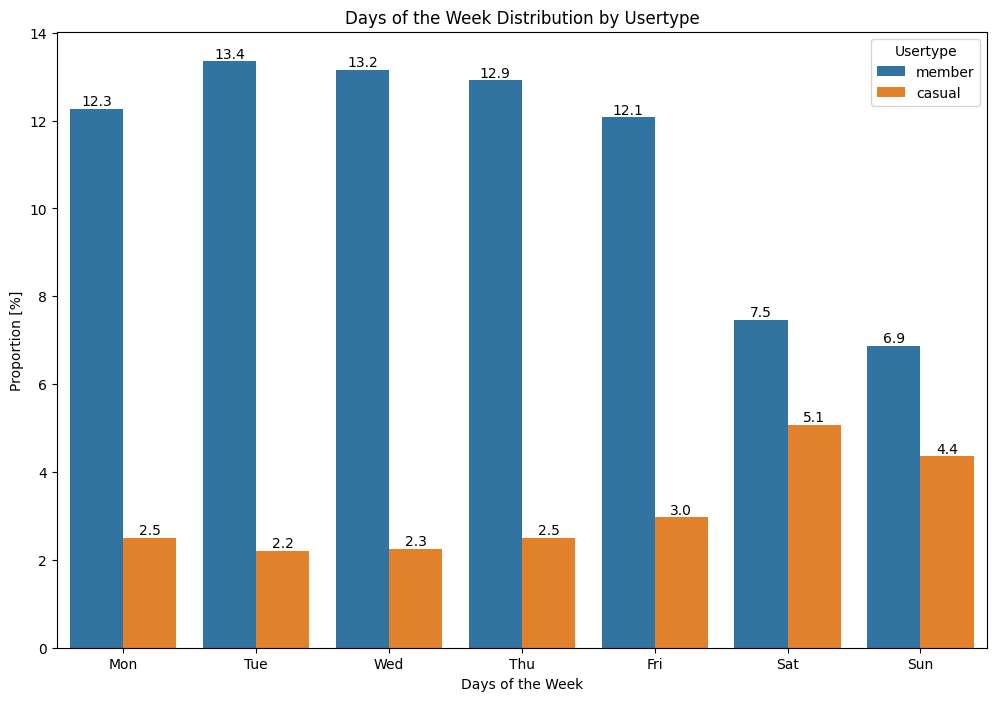

In [56]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data = df_transformed, x = "start_day_of_week", hue = "usertype", stat = "percent", order = DAY_ORDER)

plt.title("Days of the Week Distribution by Usertype")
plt.xlabel("Days of the Week")
plt.ylabel("Proportion [%]")
plt.legend(title="Usertype")
plt.xticks(ticks=range(len(DAY_ORDER)), labels=[label[:3] for label in DAY_ORDER])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f")

plt.show()

The graph shows a clear distinction between user types, as the majority of members use the service mostly on weekdays, suggesting they are commuting to work. For casual users, there is an increase in usage on weekends, which suggests leisure activity. However, there is also a proportion of casual users on weekdays, which could include tourists or unconverted potential members.

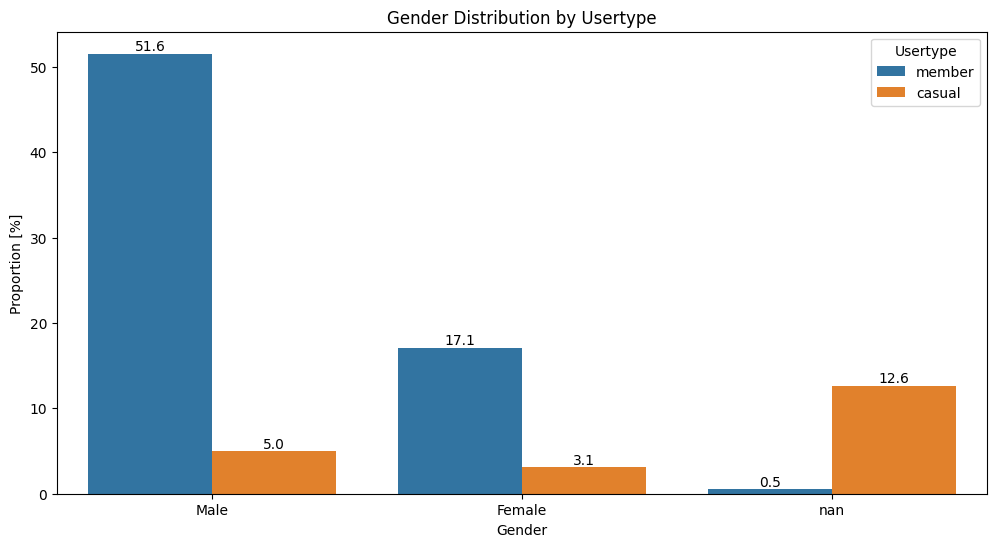

In [57]:

plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df_transformed, x = "gender", hue = "usertype", stat = "percent")

plt.title("Gender Distribution by Usertype")
plt.xlabel("Gender")
plt.ylabel("Proportion [%]")
plt.legend(title="Usertype")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f")
    
plt.show()

The service is used predominantly by male users. When the proportions of member vs. casual users for each gender are calculated, casual users make up 9.7% of the male population and 18% of the female population. This suggests that, although the majority of users are male, there is a higher proportion of unconverted casual users among females.

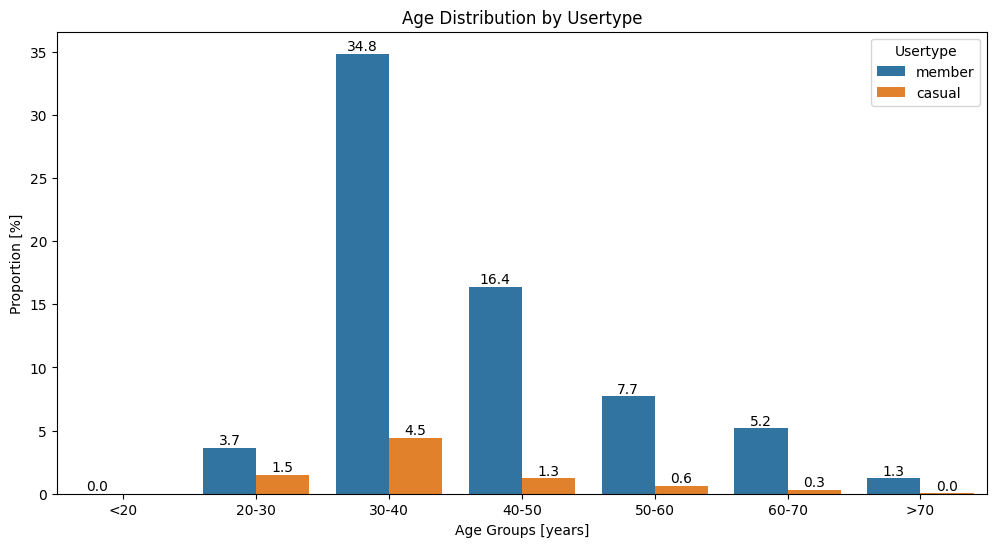

In [58]:
bins = [0, 20, 30, 40, 50, 60, 70, 150]  # 150 is more that max 125 year user
labels = ["<20", "20-30", "30-40", "40-50", "50-60", "60-70", ">70"]

df_transformed["birthyear_bins"] = pd.cut(df_transformed["age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df_transformed, x = "birthyear_bins", hue = "usertype", stat = "percent")

plt.title("Age Distribution by Usertype")
plt.xlabel("Age Groups [years]")
plt.ylabel("Proportion [%]")
plt.legend(title="Usertype")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f")
    
plt.show()

The graph shows age distribution by user type. The largest user group is in the 30–40 year old range, which also contains the highest number of unconverted casual users.

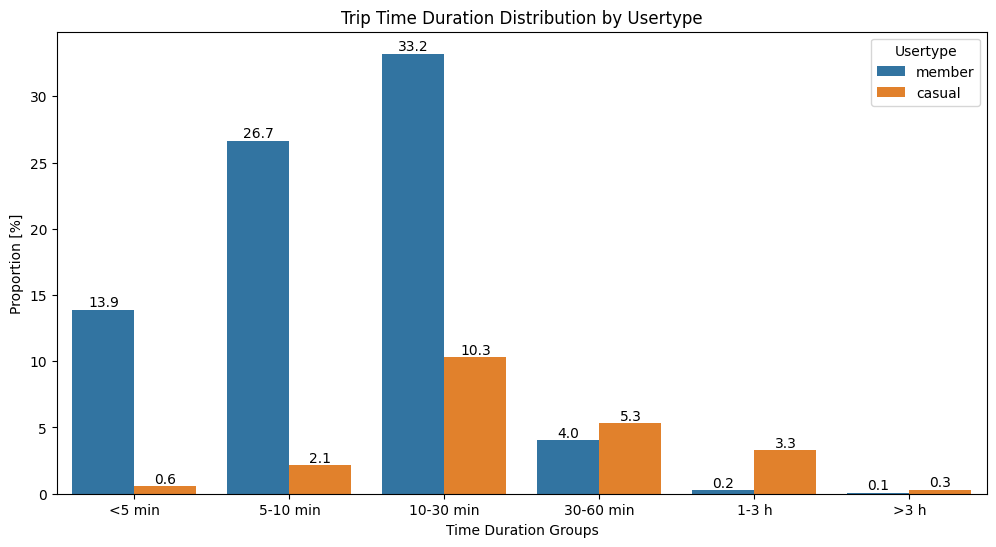

In [59]:
bins = [0, 5*60, 10*60, 30*60, 3600, 3*3600, 11000000]  # more tha the max tripduration 127 days = 11000000 seconds
labels = ["<5 min", "5-10 min", "10-30 min", "30-60 min", "1-3 h", ">3 h"]

df_transformed["tripduration_bins"] = pd.cut(df_transformed["tripduration"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df_transformed, x = "tripduration_bins", hue = "usertype", stat = "percent")

plt.title("Trip Time Duration Distribution by Usertype")
plt.xlabel("Time Duration Groups")
plt.ylabel("Proportion [%]")
plt.legend(title="Usertype")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f")

plt.show()

The graph shows the distribution of trip lengths by user type. The majority of members’ trips are under 30 minutes. In contrast, casual users tend to take longer trips, peaking in the 10–30 minute range, with some trips lasting up to 3 hours.

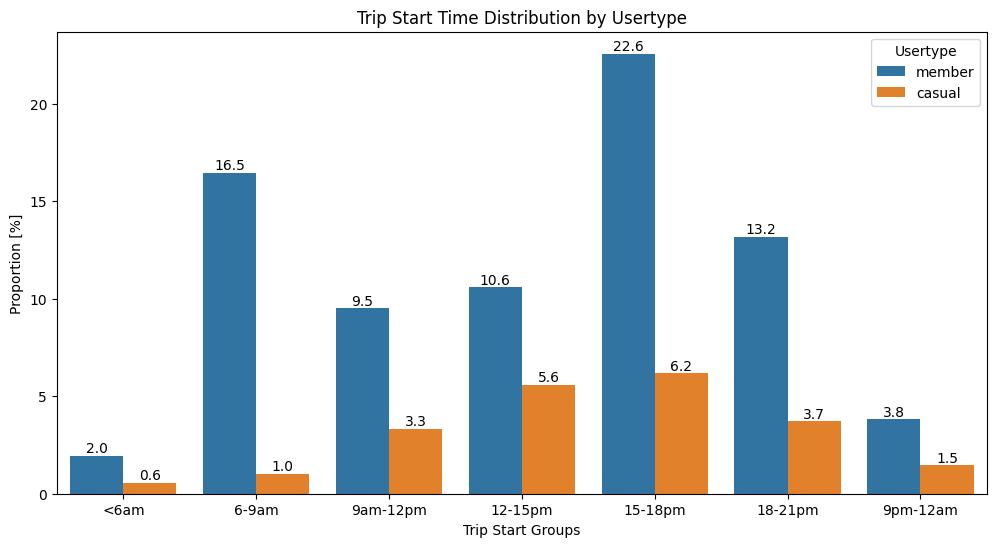

In [60]:
bins = [0, 6, 9, 12, 15, 18, 21, 24] 
labels = ["<6am", "6-9am", "9am-12pm", "12-15pm", "15-18pm", "18-21pm", "9pm-12am"]

df_transformed["start_hour_bins"] = pd.cut(df_transformed["start_hour"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df_transformed, x = "start_hour_bins", hue = "usertype", stat = "percent")

plt.title("Trip Start Time Distribution by Usertype")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.xlabel("Trip Start Groups")
plt.ylabel("Proportion [%]")
plt.legend(title="Usertype")

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f")

plt.show()

The graph shows the distribution of trip start times by user type. Member users, previously identified as commuting, show peak usage in the morning and evening, reinforcing the commuting pattern. Casual users predominantly use the service in the afternoon, supporting the idea of leisure-oriented usage.

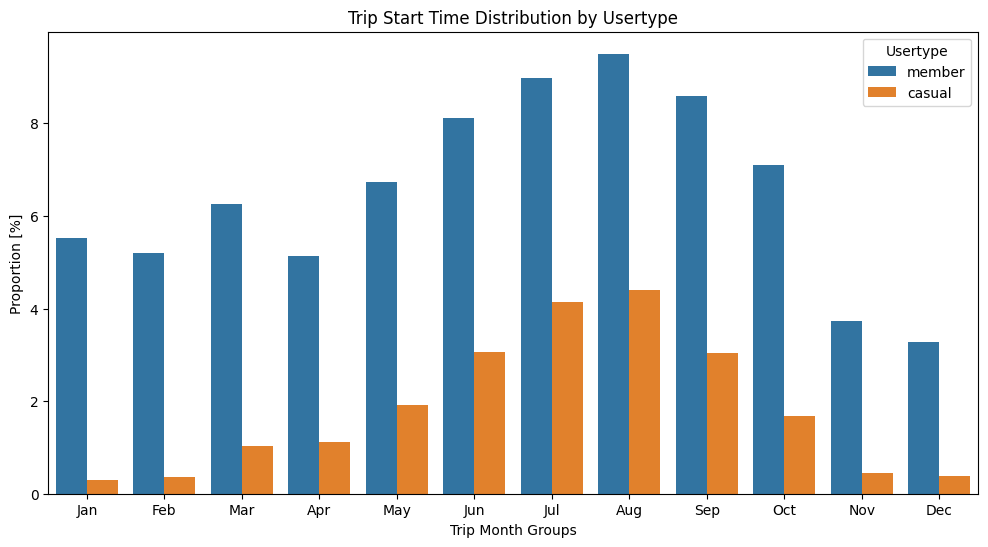

In [61]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df_transformed, x = "start_month", hue = "usertype", stat = "percent")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.title("Trip Start Time Distribution by Usertype")
plt.xlabel("Trip Month Groups")
plt.ylabel("Proportion [%]")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Usertype")

plt.show()

The graph shows the distribution of trips by month for different user types. Casual users show increased usage during the summer months, indicating a potential opportunity for targeted promotions during this period to convert them to members.

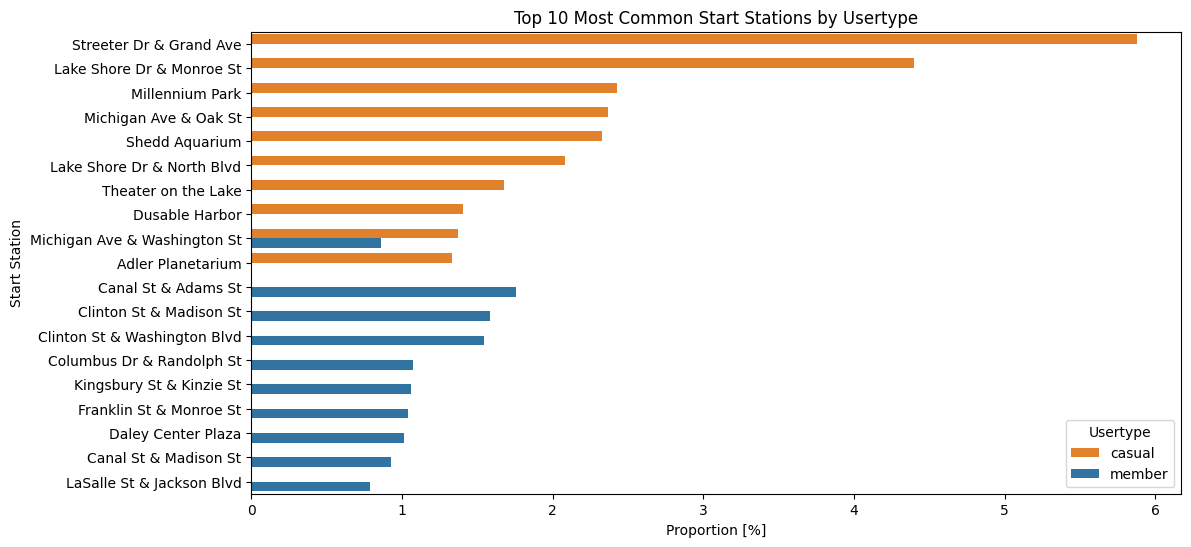

In [62]:
n_top_stations = 10

start_stations = (
    df_transformed.groupby(['usertype', 'from_station_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['usertype', 'count'], ascending=[True, False])
)

total_trips_per_usertype = start_stations.groupby('usertype')['count'].sum().reset_index(name='total_count')

start_stations = start_stations.merge(total_trips_per_usertype, on='usertype')
start_stations['normalized_count'] = start_stations['count'] / start_stations['total_count'] * 100  # Convert to percentage

top_start_stations = start_stations.groupby('usertype').head(n_top_stations).copy()

custom_palette = {"member": "#1f77b4", "casual": "#ff7f0e"}
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_start_stations,
    x='normalized_count',
    y='from_station_name',
    hue='usertype',
    palette=custom_palette,
    dodge=True
)
plt.title(f"Top {n_top_stations} Most Common Start Stations by Usertype")
plt.xlabel("Proportion [%]")
plt.ylabel("Start Station")
plt.legend(title="Usertype")
plt.show()

The graph of the most common start stations by user type shows a clear distinction between casual and member users. This suggests the possibility of promoting specific stations to encourage casual users to convert to membership.

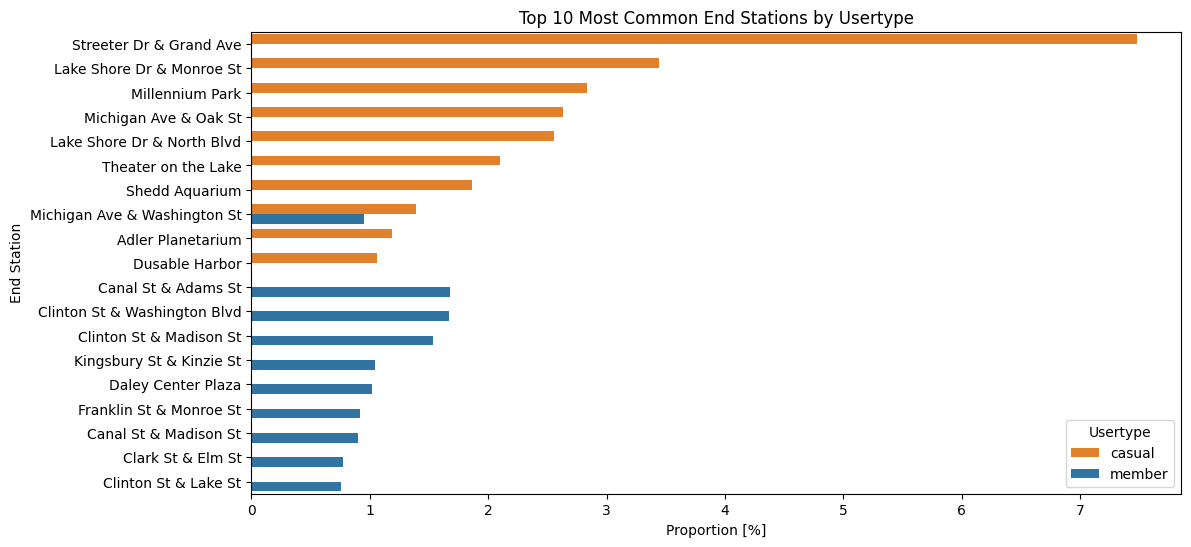

In [63]:
n_top_stations = 10

start_stations = (
    df_transformed.groupby(['usertype', 'to_station_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['usertype', 'count'], ascending=[True, False])
)

total_trips_per_usertype = start_stations.groupby('usertype')['count'].sum().reset_index(name='total_count')

start_stations = start_stations.merge(total_trips_per_usertype, on='usertype')
start_stations['normalized_count'] = start_stations['count'] / start_stations['total_count'] * 100  # Convert to percentage

top_start_stations = start_stations.groupby('usertype').head(n_top_stations).copy()

custom_palette = {"member": "#1f77b4", "casual": "#ff7f0e"}
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_start_stations,
    x='normalized_count',
    y='to_station_name',
    hue='usertype',
    palette=custom_palette,
    dodge=True
)
plt.title(f"Top {n_top_stations} Most Common End Stations by Usertype")
plt.xlabel("Proportion [%]")
plt.ylabel("End Station")
plt.legend(title="Usertype")
plt.show()

Similarly to the start stations, the most common destinations show a clear distinction between user types. Moreover, many popular end stations for casual users are the same as their start stations, further supporting the idea of targeted promotions for these locations.

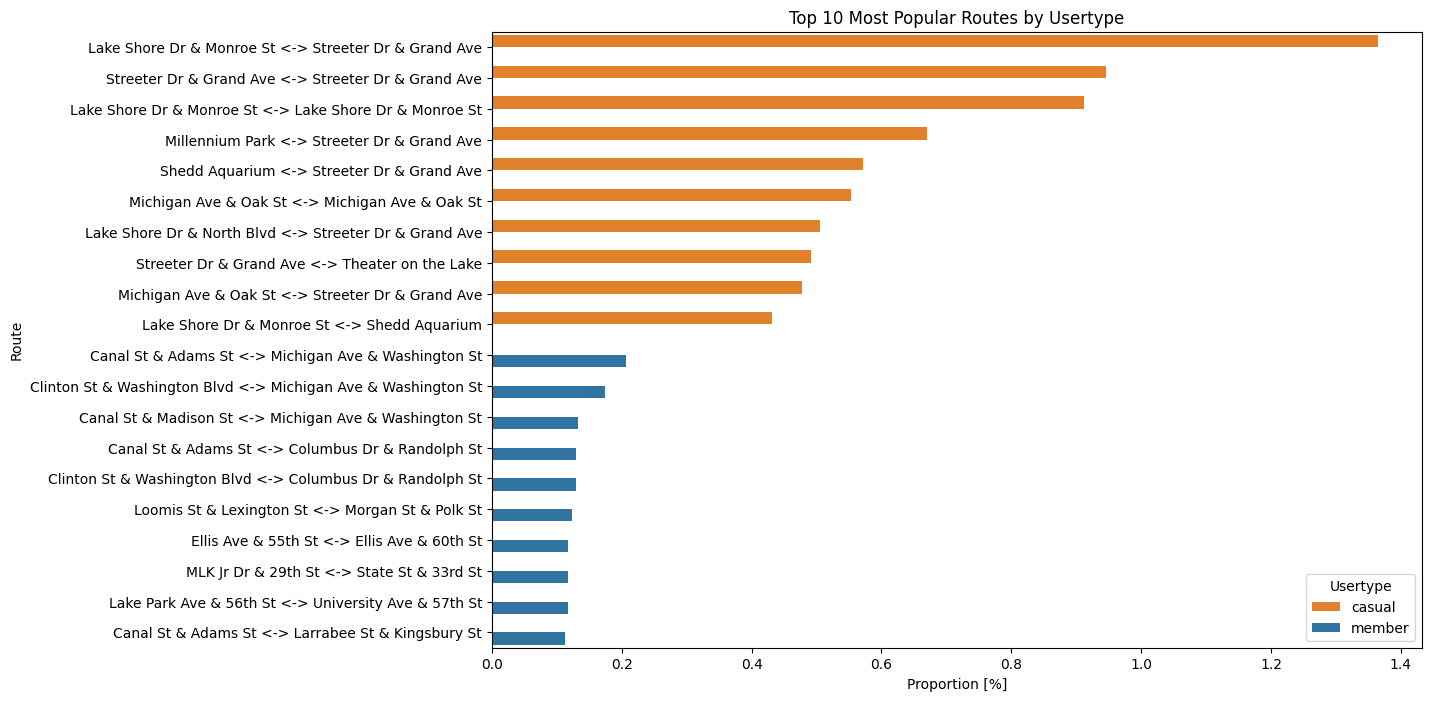

In [64]:
n_top_stations = 10

df_transformed['normalized_route'] = df_transformed.apply(
   lambda row: tuple(sorted([row['from_station_name'], row['to_station_name']])), axis=1
)

popular_routes = (
    df_transformed.groupby(['usertype', "normalized_route"])
    .size()
    .reset_index(name='count')
    .sort_values(['usertype', 'count'], ascending=[True, False])
)

popular_routes[['from_station_name', 'to_station_name']] = pd.DataFrame(
   popular_routes['normalized_route'].tolist(), index=popular_routes.index
)

total_trips_per_usertype = popular_routes.groupby('usertype')['count'].sum().reset_index(name='total_count')

popular_routes = popular_routes.merge(total_trips_per_usertype, on='usertype')
popular_routes['normalized_count'] = popular_routes['count'] / popular_routes['total_count'] * 100  # Convert to percentage

top_routes = popular_routes.groupby('usertype').head(n_top_stations).copy()

top_routes['route'] = top_routes['from_station_name'] + " <-> " + top_routes['to_station_name']

custom_palette = {"member": "#1f77b4", "casual": "#ff7f0e"}
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_routes,
    x='normalized_count',
    y='route',
    hue='usertype',
    palette=custom_palette,
    dodge=True
)
plt.title(f"Top {n_top_stations} Most Popular Routes by Usertype")
plt.xlabel("Proportion [%]")
plt.ylabel("Route")
plt.legend(title="Usertype")
plt.show()

The most popular routes also reveal commonly used paths among casual users.

In [65]:
# To silence deprecated warning because of usage of Scattermapbox, for better control over the map, as Scatermap has some issues with zoom and mapcentering
warnings.filterwarnings("ignore", category=DeprecationWarning)

n_top_stations = 50

top_routes_map = pd.DataFrame()
top_routes_map.drop(top_routes_map.index, inplace=True)
top_routes_map = (
    df_transformed.groupby(['usertype', 'normalized_route', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])
    .size()
    .reset_index(name='count')
    .sort_values(['usertype', 'count'], ascending=[True, False])
)

top_routes_map[['from_station_name', 'to_station_name']] = pd.DataFrame(
   top_routes_map['normalized_route'].tolist(), index=top_routes_map.index
)

total_trips_per_usertype = top_routes_map.groupby('usertype')['count'].sum().reset_index(name='total_count')

top_routes_map = top_routes_map.merge(total_trips_per_usertype, on='usertype')
top_routes_map['normalized_count'] = top_routes_map['count'] / top_routes_map['total_count'] * 100  # Convert to percentage

top_routes_map_selected = top_routes_map.groupby('usertype').head(n_top_stations).copy()

usertype_colors = {
    'member': "#1f77b4",
    'casual': "#ff7f0e"
}

plotly_data = []

for _, row in top_routes_map_selected.iterrows():
    color = usertype_colors.get(row['usertype'], 'black')

    # Lines between start and end points
    plotly_data.append(
        go.Scattermapbox(
            lat=[row['start_lat'], row['end_lat']],
            lon=[row['start_lng'], row['end_lng']],
            mode='lines',
            line=dict(width=2, color=color),
            name=f"{row['usertype']} Route",
            legendgroup=row['usertype'],
            showlegend=False,
            hoverinfo='text',
            text=f"Route: {row['from_station_name']} <-> {row['to_station_name']}"
        )
    )

    # start point marker
    plotly_data.append(
        go.Scattermapbox(
            lat=[row['start_lat']],
            lon=[row['start_lng']],
            mode='markers',
            marker=dict(size=8, color=color),
            name=f"{row['usertype']} Start",
            legendgroup=row['usertype'],
            showlegend=False,
            text=f"{row['from_station_name']}",
            hoverinfo='text'
        )
    )

    # end point marker
    plotly_data.append(
        go.Scattermapbox(
            lat=[row['end_lat']],
            lon=[row['end_lng']],
            mode='markers',
            marker=dict(size=8, color=color),
            name=f"{row['usertype']} End",
            legendgroup=row['usertype'],
            showlegend=False,
            text=f"{row['to_station_name']}",
            hoverinfo='text'
        )
    )
# dummy points for legend
for usertype, color in usertype_colors.items():
    plotly_data.append(
        go.Scattermapbox(
            lat=[None],
            lon=[None],
            mode='markers',
            marker=dict(size=8, color=color),
            name=usertype.capitalize(),
            legendgroup=usertype,
            showlegend=True
        )
    )


fig = go.Figure(data=plotly_data)
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=top_routes_map_selected['start_lat'].mean(), lon=top_routes_map_selected['start_lng'].mean()),
        zoom=10,
    ),
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    autosize=True
)

fig.show()


The map shows the top routes taken by different user types. Casual users primarily operate in the lakeside area, which could be a potential target for promotional efforts.

## Conclusion

The analysis of the data reveals distinct usage patterns between **_member_** and **_casual_** users of the service. **_Member_** usage is concentrated on **weekdays**, with peak hours aligning with typical **commuting** times, indicating that _members_ primarily use the service for work-related travel. In contrast, **_casual_** users show increased activity on weekends and in the afternoons, pointing to a **predominantly leisure-oriented** usage pattern. 

Demographically, the service is **used predominantly by males**; however, a **higher percentage** of **female users remain unconverted** _casual_ users, highlighting a potential area for targeted conversion strategies. Age-wise, the **30–40 year old** demographic constitutes the **largest user segment**, including a **significant proportion** of unconverted **_casual_** users.

Trip duration further differentiates user types, with **_members_** favoring **shorter trips** (under 30 minutes) and **_casual_** users engaging in **longer rides**, often **exceeding 30 minutes**. Seasonal usage trends indicate that **_casual_** user activity rises **during summer** months, suggesting an opportunity for seasonal promotions aimed at conversion.

Spatial data on start and end stations, as well as popular routes, show distinct preferences between user types. **_Casual_ users are heavily concentrated around lakeside areas**, indicating these zones as high-potential targets for marketing and conversion efforts. Promotions focused on **popular _casual_ user stations and routes**, particularly during **peak leisure times and summer months**, could support **increased conversion** to membership.